In [21]:
from utils import load_mnist
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
import pandas as pd
import itertools
from plot_confusion_matrix import plot_confusion_matrix

# Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Preprocessing - Scaling

In [3]:
x_train = x_train.reshape(len(x_train),28*28)
x_test = x_test.reshape(len(x_test),28*28)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# hyperparameter
1. Prototype selection - PCA dimensionality reduction.

2. Distance = manhattan_distance (l1), euclidean_distance (l2), minkowski_distance (l_p). Changed by changing p.

# Preprocessing - PCA reduction

In [4]:
def pca_transform(pca_dim, x_train,x_test):
    pca = PCA(n_components = pca_dim)
    pca.fit(x_train)
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    return x_train, x_test

In [5]:
n_components = [int(784/16),int(784/12),int(784/8),int(784/6),int(784/4),int(784/2),int(784)]
p_value = [1,2]
acc_log = []
for j in tqdm(p_value):
    for i in n_components:
        x_train_reduced,x_test_reduced = pca_transform(i, x_train,x_test)
        knn=neighbors.KNeighborsClassifier(n_neighbors=1, p = j)
        knn.fit(x_train_reduced, np.argmax(y_train, axis =1))
        z = knn.predict(x_test_reduced)
        acc_log.append([i,j,z])

100%|████████████████████████████████████████████████████████████████████████████████| 2/2 [1:07:38<00:00, 2029.43s/it]


In [7]:
for i in acc_log:
    print(i,j,accuracy_score(i[2],np.argmax(y_test, axis =1)))

[49, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9531
[65, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9539
[98, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.955
[130, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9531
[196, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.948
[392, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9303
[784, 1, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9159
[49, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9545
[65, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9557
[98, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9573
[130, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9574
[196, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9549
[392, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9465
[784, 2, array([7, 2, 1, ..., 4, 5, 6], dtype=int64)] 2 0.9434


In [8]:
# check on higher dimension
x_train_reduced,x_test_reduced = pca_transform(130, x_train,x_test)
knn=neighbors.KNeighborsClassifier(n_neighbors=1, p = 3)
knn.fit(x_train_reduced, np.argmax(y_train, axis =1))
z = knn.predict(x_test_reduced)
print(accuracy_score(z,np.argmax(y_test, axis =1)))

0.9549


In [9]:
# check on higher dimension
x_train_reduced,x_test_reduced = pca_transform(130, x_train,x_test)
knn=neighbors.KNeighborsClassifier(n_neighbors=1, p = 4)
knn.fit(x_train_reduced, np.argmax(y_train, axis =1))
z = knn.predict(x_test_reduced)
print(accuracy_score(z,np.argmax(y_test, axis =1)))

0.9537


In [11]:
x_train_reduced,x_test_reduced = pca_transform(130, x_train,x_test)
knn=neighbors.KNeighborsClassifier(n_neighbors=1, p = 2)
knn.fit(x_train_reduced, np.argmax(y_train, axis =1))
z = knn.predict(x_test_reduced)
print(accuracy_score(z,np.argmax(y_test, axis =1)))

0.9576


In [24]:
conf_plot = confusion_matrix(z,np.argmax(y_test, axis =1))

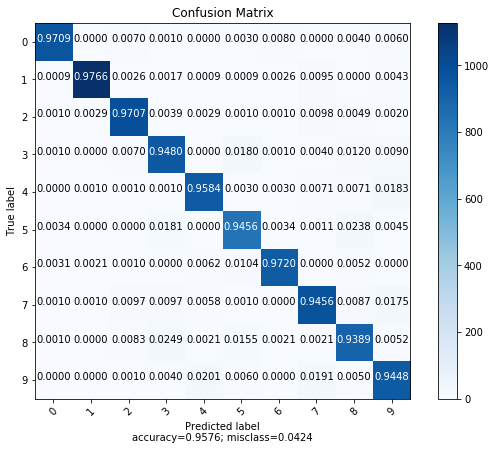

In [26]:
plot_confusion_matrix(conf_plot, 
                      normalize    = True,
                      target_names = ['0','1','2','3','4','5','6','7','8','9'],
                      title        = "Confusion Matrix")

In [23]:
confusion_matrix

<function sklearn.metrics.classification.confusion_matrix>